## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [5]:
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [6]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [7]:
replace_dict = {0.75: 1, 1.75: 2, 2.75: 3, 3.75: 4, 4.75: 5, 5.75: 6, 6.75: 7, 7.75: 8, 
                1.25: 1.5, 2.25: 2.5, 3.25: 3.5, 4.25: 4.5, 5.25: 5.5, 6.25: 6.5}
housing_df['bathrooms'] = housing_df['bathrooms'].replace(replace_dict)

In [8]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [9]:
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [10]:
from sklearn.impute import SimpleImputer
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [11]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [12]:
from sklearn.impute import SimpleImputer
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

In [13]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
datetime            0
soldyear            0
age_when_sold       0
grade_num           0
Basement            0
dtype: int64

In [14]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long', 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [15]:
housing_ols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,age_when_sold,grade_num,Basement
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0.0,NONE,3,98178,59,7,0
1,6414100192,538000.0,3,2.5,2570,7242,2.0,0.0,NONE,3,98125,63,7,1
2,5631500400,180000.0,2,1.0,770,10000,1.0,0.0,NONE,3,98028,82,6,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0.0,NONE,5,98136,49,7,1
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0.0,NONE,3,98074,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.5,1530,1131,3.0,0.0,NONE,3,98103,5,8,0
21593,6600060120,400000.0,4,2.5,2310,5813,2.0,0.0,NONE,3,98146,1,8,0
21594,1523300141,402101.0,2,1.0,1020,1350,2.0,0.0,NONE,3,98144,5,7,0
21595,291310100,400000.0,3,2.5,1600,2388,2.0,0.0,NONE,3,98027,11,8,0


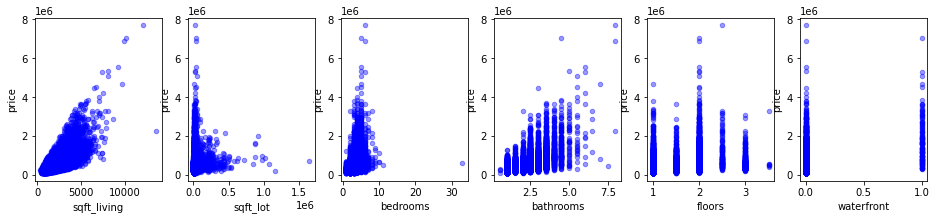

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'waterfront'], axes):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [17]:
correlation = housing_ols['price']. corr(housing_ols['grade_num']) 
correlation

0.6679507713876449

In [21]:
housing_ols.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,age_when_sold,grade_num,Basement
id,1.000000,-0.016772,0.001150,0.002964,-0.012241,-0.131911,0.018608,-0.003599,-0.023803,-0.008211,-0.021458,0.008188,0.002585
price,-0.016772,1.000000,0.308787,0.524118,0.701917,0.089876,0.256804,0.264306,0.036056,-0.053402,-0.053890,0.667951,0.180082
bedrooms,0.001150,0.308787,1.000000,0.514430,0.578212,0.032471,0.177944,-0.002127,0.026496,-0.154092,-0.155817,0.356563,0.162186
bathrooms,0.002964,0.524118,0.514430,1.000000,0.749400,0.089166,0.475999,0.065804,-0.107609,-0.206729,-0.493269,0.657927,0.189898
sqft_living,-0.012241,0.701917,0.578212,0.749400,1.000000,0.173453,0.353953,0.104637,-0.059445,-0.199802,-0.318592,0.762779,0.204324
sqft_lot,-0.131911,0.089876,0.032471,0.089166,0.173453,1.000000,-0.004814,0.021459,-0.008830,-0.129586,-0.052853,0.114731,-0.035227
floors,0.018608,0.256804,0.177944,0.475999,0.353953,-0.004814,1.000000,0.020797,-0.264075,-0.059541,-0.489514,0.458794,-0.256545
waterfront,-0.003599,0.264306,-0.002127,0.065804,0.104637,0.021459,0.020797,1.000000,0.016648,0.028923,0.024406,0.082818,0.040061
condition,-0.023803,0.036056,0.026496,-0.107609,-0.059445,-0.008830,-0.264075,0.016648,1.000000,0.002888,0.360836,-0.146896,0.135211
zipcode,-0.008211,-0.053402,-0.154092,-0.206729,-0.199802,-0.129586,-0.059541,0.028923,0.002888,1.000000,0.347206,-0.185771,0.162861


In [18]:
formula_price_grade = 'price ~C(grade_num) +sqft_living + C(bedrooms) + C(bathrooms) + sqft_lot+ C(floors) + C(waterfront) + C(condition) + C(zipcode) + age_when_sold + C(Basement)'
formula_price_grade_model = ols(formula = formula_price_grade, data = housing_ols).fit()
formula_price_grade_model_summary = formula_price_grade_model.summary()
formula_price_grade_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:56:39   Log-Likelihood:            -2.8828e+05
No. Observations:               21597   AIC:                         5.768e+05
Df Residuals:                   21477   BIC:                         5.778e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.086e+04   1.73e+05     -0.467      0.640    -4.2e+05    2.59e+05
C(grade_num)[T.4]    -8.134e+04   1.55e+05     -0.523      0.601   -3.86e+05    2.23e+05
C(grade_num)[T.5]     -1.31e+05   1.53e+05     -0.856      0.392   -4.31e+05    1.69e+05
C(grade_num)[T.6]    -1.313e+05   1.53e+05     -0.859      0.390   -4.31e+05    1.68e+05
C(grade_num)[T.7]    -1.117e+05   1.53e+05     -0.731      0.465   -4.11e+05    1.88e+05
C(grade_num)[T.8]    -6.709e+04   1.53e+05     -0.439      0.661   -3.67e+05    2.33e+05
C(grade_num)[T.9]     2.434e+04   1.53e+05      0.159      0.874   -2.76e+05    3.24e+05
C(grade_num)[T.10]    1.481e+05   1.53e+05      0.967      0.333   -1.52e+05    4.48e+05
C(grade_num)[T.11]    3.409e+05   1.53e+05      2.224      0.026    4.04e+04    6.41e+05
C(grade_num)[T.12]     7.08e+05   1.54e+05      4.593      0.000    4.06e+05    1.01e+06
C(grade_num)[T.13]    1.533e+06    1.6e+05      9.572      0.000    1.22e+06    1.85e+06
C(bedrooms)[T.2]      5657.2818   1.16e+04      0.489      0.625    -1.7e+04    2.83e+04
C(bedrooms)[T.3]      1.191e+04   1.16e+04      1.027      0.305   -1.08e+04    3.46e+04
C(bedrooms)[T.4]     -8853.3815   1.19e+04     -0.747      0.455   -3.21e+04    1.44e+04
C(bedrooms)[T.5]     -2.662e+04   1.25e+04     -2.128      0.033   -5.11e+04   -2103.710
C(bedrooms)[T.6]     -6.545e+04   1.53e+04     -4.291      0.000   -9.53e+04   -3.56e+04
C(bedrooms)[T.7]      -2.15e+05    2.8e+04     -7.675      0.000    -2.7e+05    -1.6e+05
C(bedrooms)[T.8]     -8.994e+04   4.45e+04     -2.020      0.043   -1.77e+05   -2669.573
C(bedrooms)[T.9]     -2.265e+05   6.98e+04     -3.244      0.001   -3.63e+05   -8.97e+04
C(bedrooms)[T.10]    -3.605e+05   8.95e+04     -4.029      0.000   -5.36e+05   -1.85e+05
C(bedrooms)[T.11]     -4.41e+04   1.53e+05     -0.288      0.773   -3.44e+05    2.56e+05
C(bedrooms)[T.33]     3.872e+04   1.53e+05      0.254      0.800   -2.61e+05    3.38e+05
C(bathrooms)[T.1.0]   3.528e+04   7.62e+04      0.463      0.644   -1.14e+05    1.85e+05
C(bathrooms)[T.1.5]   3.085e+04   7.63e+04      0.404      0.686   -1.19e+05     1.8e+05
C(bathrooms)[T.2.0]   3.218e+04   7.63e+04      0.422      0.673   -1.17e+05    1.82e+05
C(bathrooms)[T.2.5]   4.731e+04   7.63e+04      0.620      0.535   -1.02e+05    1.97e+05
C(bathrooms)[T.3.0]   5.576e+04   7.64e+04      0.730      0.465   -9.39e+04    2.05e+05
C(bathrooms)[T.3.5]   9.054e+04   7.65e+04      1.184      0.236   -5.93e+04     2.4e+05
C(bathrooms)[T.4.0]   1.523e+05   7.69e+04      1.979      0.048    1476.117    3.03e+05
C(bathrooms)[T.4.5]   2.025e+05   7.74e+04      2.618      0.009    5.09e+04    3.54e+05
C(bathrooms)[T.5.0]   3.617e+05      8e+04      4.518      0.000    2.05e+05    5.19e+05
C(bathrooms)[T.5.5]   3.305e+05   8.33e+04      3.968    